# Assignment 2
### Understanding Uncertainty
### Due 9/12
### Maggie Crowner

1. 'State Bottle Retail' is the price at which the bottle is sold, while 'State Bottle Cost' is the price the state pays for a bottle.
- How do you define the most profitable item? Why? Explain your thinking.
- Use `.groupby` calculations to determine the most profitable liquors sold in Iowa.
- Make a plot of the top liquors.

I would define "most profitable" as the item with the highest average profit margin. I would calculate this using State Bottle Retail minus State Bottle Cost to get the amount of profit that an item yields, divided by State Bottle Retail and multiplied by 100. This measures the average value of profit made by beyond the cost itself for that particular item at any store. I am not factoring in Bottles Sold, because that would distort profit itself since not all stores carry the same items. I am representing this with the margin and as a percentage to accurately represent the amount of profit that any particular item yields. While some items may have a higher net profit, they could still have a lower percentage due to being expensive liquors in general, which makes them likely to be purchased less, which does not make them the most profitable in my eyes.

In [65]:
import pandas as pd

liquor = pd.read_csv('data/iowa.csv')

liquor['Profit%']=((liquor['State Bottle Retail'] - liquor['State Bottle Cost']) / liquor['State Bottle Retail']) * 100
liquor_profit = liquor.groupby('Item Description', as_index=False)['Profit%'].mean()
sorted_profit = liquor_profit.sort_values(by='Profit%', ascending=False)
print("Top 10 most profitable liquors: \n",
      sorted_profit.head(10))

Top 10 most profitable liquors: 
                                 Item Description    Profit%
2602  JAGERMEISTER COLD BREW COFFEE LIQUEUR MINI  46.829697
1669           DRIFTLESS GLEN 5YR RESERVE BRANDY  41.666667
4748                      STOLICHNAYA ELIT VODKA  40.010670
2870                             KAHLUA HAZELNUT  38.119441
5076                TRIPLE CROWN BLENDED WHISKEY  37.950139
3156               MALIBU BLUE HAWAIIAN COCKTAIL  37.777778
3171             MALIBU MELON MARGARITA COCKTAIL  37.722420
1513  DEKUYPER LUSCIOUS POMEGRANATE PLEASURE LIQ  37.278107
4312                            SHELLBACK SILVER  37.171910
3018                KUHL HIPPIE HOOCH LOVE PUNCH  37.104072


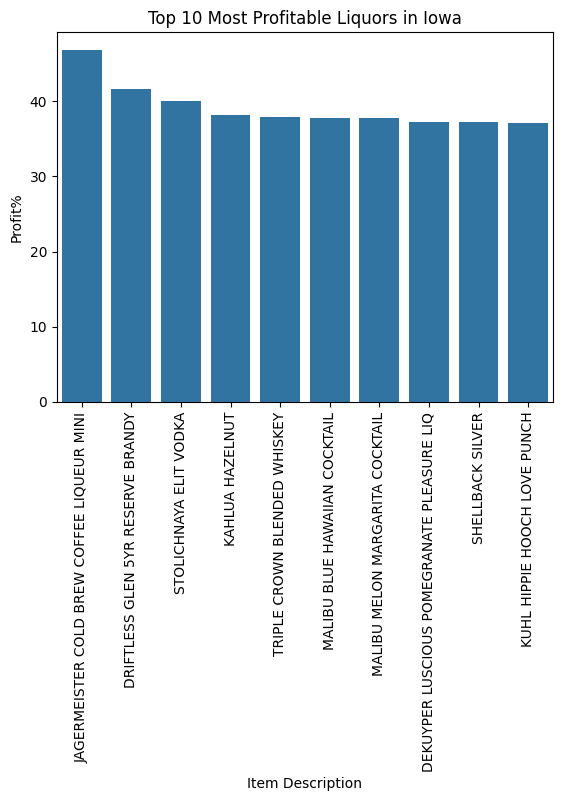

In [66]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.barplot(data=sorted_profit.head(10), x='Item Description', y='Profit%')
plt.xticks(rotation=90)
plt.title('Top 10 Most Profitable Liquors in Iowa')
plt.show()

2. This question is to further explore broadcasting in NumPy.

- In the first code chunk below, there are two vectors, $x$ and $y$. What happens when you try to subtract them?
- Instead, try `x.reshape(-1,1)-y.reshape(1,-1)`. What do you get?
- Try `x.reshape(1,-1)-y.reshape(-1,1)`. Compare the results to your previous answer.
- Write two double for-loops to replicate the results of the previous two answers. 
- Clearly explain how `x.reshape(1,-1)` and `x.reshape(-1,1)` change $x$

In [67]:
import numpy as np

x = np.array([1,3,5])
y = np.array([2,5])

In [68]:
x - y

ValueError: operands could not be broadcast together with shapes (3,) (2,) 

You cannot subtract vectors of different lengths, and you cannot perform broadcasting if they are not compatible shapes.

In [ ]:
x.reshape(-1,1) - y.reshape(1,-1)

array([[-1, -4],
       [ 1, -2],
       [ 3,  0]])

In [ ]:
x.reshape(1,-1) - y.reshape(-1,1)

array([[-1,  1,  3],
       [-4, -2,  0]])

In [ ]:
result = np.empty(shape=(len(x),len(y)), dtype=int)
for i in range(x.shape[0]):
    for j in range(y.shape[0]):
        result[i, j] = x[i] - y[j]
print(result)

[[-1 -4]
 [ 1 -2]
 [ 3  0]]


In [ ]:
result = np.empty(shape=(len(y),len(x)), dtype=int)
for i in range(y.shape[0]):
    for j in range(x.shape[0]):
        result[i, j] = y[i] - x[j]
print(result)

[[ 1 -1 -3]
 [ 4  2  0]]


The reshape function used above for broadcasting changes x or y to be either a row or column vector. Subtracting a row vector from a column vector, or vice versa, is not possible according to typical matrix subtraction rules, but is made possible in numpy via broadcasting. x.reshape(1,-1) forces x to have only one row, which in this case is already how it is laid out. x.reshape(-1,1) forces x to have only one column no matter how many rows, which is what turns it into a column vector. In the example where x is transformed into a column vector, it acts as a 3x2 matrix of equivalent columns while y acts as a 3x2 matrix of equivalent rows. That way, they are able to be subtracted from one another according to conventional matrix rules. Without reshaping x and y, you could not make a 1x3 vector the same shape as a 1x2 vector via broadcasting, so this subtraction cannot occur.

3. The indicator function $\mathbb{I}\{ x \le z \}$ takes the value 0 if $x>z$ and 1 if $x \le z$ is true, or
$$
\mathbb{I}\{x \le z\} = \begin{cases}
0, &x > z \\
1, &x \le z
\end{cases}
$$

- For $x = 3$, plot the indicator function for any $z$
- Explain how $ 1- \mathbb{I}\{ x \le z \} = \mathbb{I}\{ x > z \}$. Drawing a plot might help, or looking at the definition given above.
- The code below generates a random sample for different numbers of observations, $N = 3, 30, 300, 3000 $. Write a function to compute the ECDF curve for each sample, and plot your results.
- Describe in your own words what happens to the ECDF qualitatively as the sample size $N$ increases

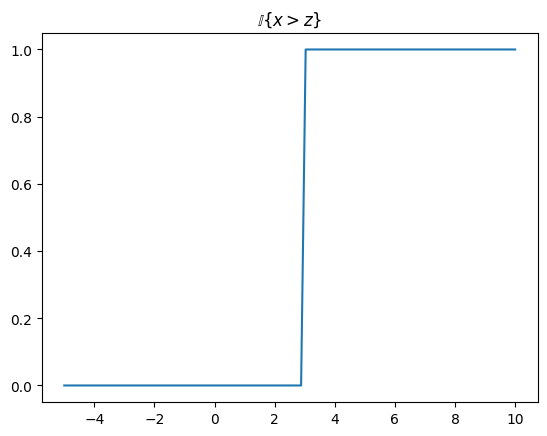

In [ ]:
x = 3
z = np.linspace(-5, 10, 100)
def ind_gr(x, z):
    return (x <= z).astype(int)
sns.lineplot(y = ind_gr(3, z), x = z).set(title = '$ \\mathbb{I}\\{x > z \\}$')
plt.show()

Since the indicator function is always equal to either 0 or 1, subtracting it from 1 would just make it the opposite value than it initially was. 1 - 0 = 1 and 1 - 1 = 0. Therefore, when reversing the indicator function to make x > z equal to 1 instead of 0, and x <= z equal to 0 instead of 1, subtracting the indicator function from 1 yields the exact same results as that reversed indicator function.

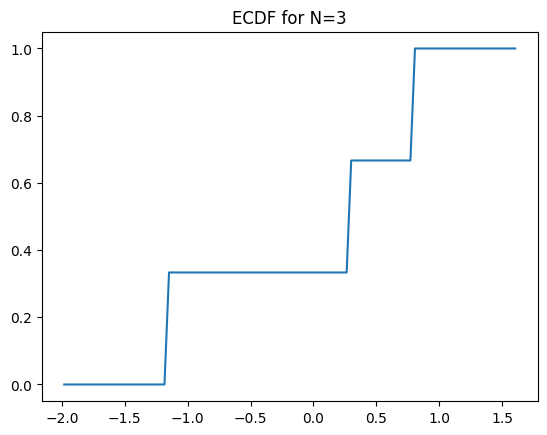

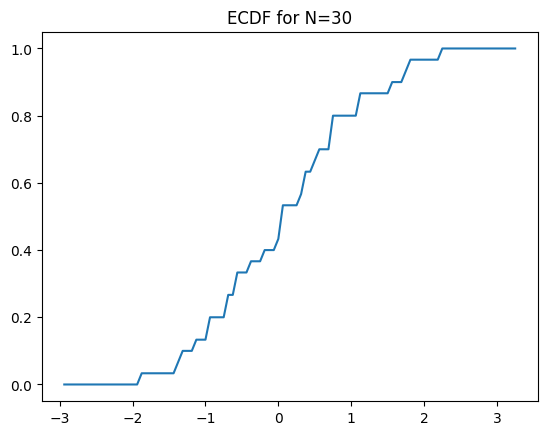

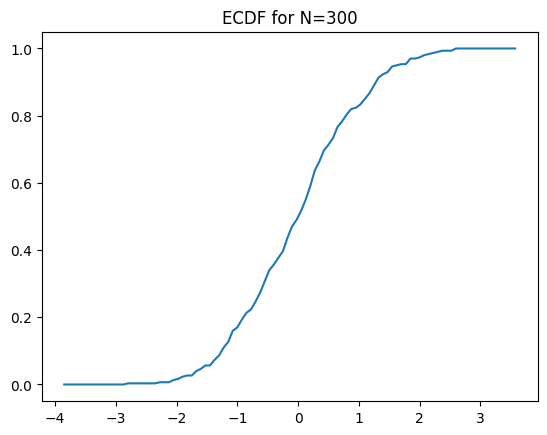

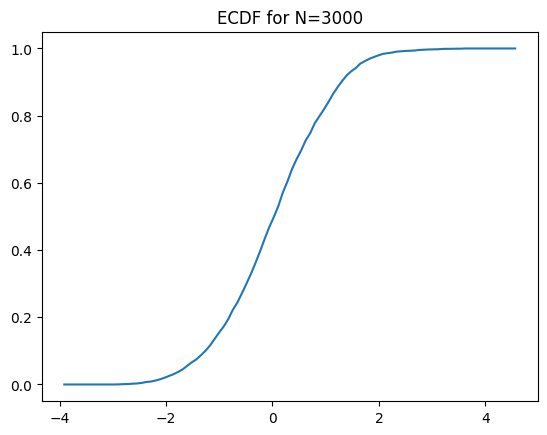

In [ ]:
import numpy as np
import seaborn as sns

rng = np.random.default_rng(100)

for N in (3,30,300,3000):
    X = rng.normal(0,1,N)
    grid = np.linspace(X.min()-X.std(), X.max()+X.std(), 100) 
    ecdf = 0*grid.copy() 
    for x in X:
        ecdf += (x <= grid).astype(int)
    ecdf = ecdf/len(X)
    sns.lineplot(x=grid, y=ecdf)
    plt.title(f'ECDF for N={N}')
    plt.show()


As the sample size N increases, the ECDF trends towards the true population CDF, which can be seen by the curve getting much smoother in the plots above. This is the population CDF curve for a normal distribution of X. It is much easier to see this shape with a larger sample size N, since it approximates that normal distribution much more closely.

4. A **quantile** generalizes the concept of the median so that instead of 50% of the mass below and 50% above, the $q$-quantile is the value for which $q$ proportion of the data are below that value and $(1-q)$ proportion of the data are above that value. This is a concept of **order**.

- Write a function that computes any quantile without using Numpy's `np.quantile`
- Write a function that computes the **Interquartile Range (IQR)** -- the .25 quantile and the .75 quantile, which brackets 50% of the data -- and the **whiskers**: $\pm 1.5 \times \text{IQR}$ from the edges of the IQR
- Write a function that computes a five-number summary and values for a boxplot: the minimum, the .25 quantile, the median, the .75 quantile, and the maximum, and the whiskers
- Anything outside the whiskers is an **outlier**; write a function that returns a Boolean vector indicating if the observations are outliers.
- For a numeric variable of your choice from one of the datasets, apply your functions from above, and compare your answers with `sns.boxplot` and `df.describe`. 

In [116]:
def quantile(data, q):
    if 0 <= q <= 1:
        sorted = data.sort_values(ascending=True)
        n = len(data)
        pos = int(n * q)
        q_value = sorted.iloc[pos]
        return round(float(q_value), 2)
    else:
        return None

In [106]:
def iqr(data):
    q1 = quantile(data, 0.25)
    q3 = quantile(data, 0.75)
    iqr = q3 - q1
    upper_whisker = round(q3 + (1.5 * iqr), 2)
    lower_whisker = round(q1 - (1.5 * iqr), 2)
    return lower_whisker, q1, q3, upper_whisker, iqr

In [113]:
def data_summary(data):
    summary = {
        'Minimum': min(data),
        'Lower_Quartile': quantile(data, 0.25),
        'Median': quantile(data, 0.5),
        'Upper_Quartile': quantile(data, 0.75),
        'Maximum': max(data),
        'Lower_Whisker': iqr(data)[0],
        'Upper_Whisker': iqr(data)[3]}
    return summary

In [114]:
def is_outlier(data, obs):
    summary = data_summary(data)
    lower = summary['Lower_Whisker']
    upper = summary['Upper_Whisker']
    return [ob > upper or ob < lower for ob in obs]

In [117]:
var_of_interest = liquor['Sale (Dollars)']
print('Quantile (0.25): ', quantile(var_of_interest, 0.25))
print('Interquartile Range: ', iqr(var_of_interest))
print('Data Summary: ', data_summary(var_of_interest))
print('Outliers: ', is_outlier(var_of_interest, [10,100,1000,10000,100000]))

Quantile (0.25):  36.56
Interquartile Range:  (-137.92, 36.56, 152.88, 327.36, 116.32)
Data Summary:  {'Minimum': -1628.4, 'Lower_Quartile': 36.56, 'Median': 78.66, 'Upper_Quartile': 152.88, 'Maximum': 36720.0, 'Lower_Whisker': -137.92, 'Upper_Whisker': 327.36}
Outliers:  [False, False, True, True, True]


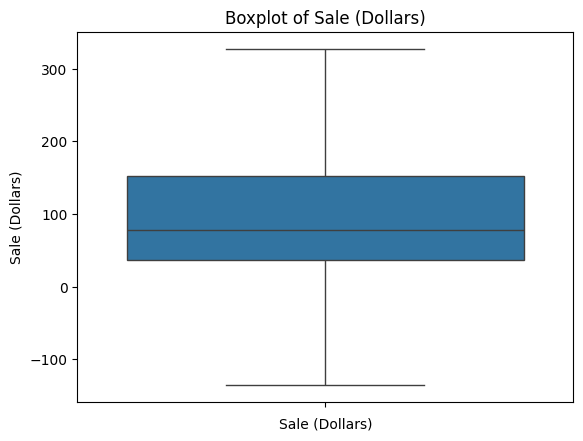

In [100]:
sns.boxplot(liquor['Sale (Dollars)'], showfliers=False)
plt.xlabel("Sale (Dollars)")
plt.title("Boxplot of Sale (Dollars)")
plt.show()

In [101]:
liquor['Sale (Dollars)'].describe()

count    159904.000000
mean        146.931598
std         459.368723
min       -1628.400000
25%          36.550000
50%          78.660000
75%         152.880000
max       36720.000000
Name: Sale (Dollars), dtype: float64

The results appear to be approximately the same for my functions versus these built-in functions.

5. The kernel density estimator captures the concentration of the data around various points, and is defined as
$$
\hat{f}_{N,h}(z) = \frac{1}{N} \sum_{i=1}^N \frac{1}{h} k \left( \frac{x_i - z}{h}\right)
$$
where $h$ is the bandwidth and $k()$ is one of the kernel functions from the class materials (Gaussian, Epanechnikov, uniform, triangular).

- Write a function that takes the bandwidth $h$ as given, and computes and plots $\hat{f}_{N,h}(z)$, for the kernels listed in the slides
- Write a function that computes the plug-in bandwidth
- Use your functions to analyze some numeric variables from a dataset of your choice, using a variety of bandwidths
- Compare bandwidths that are greater or less than the plug-in value with the results for the plug-in value. When does the KDE appear to be overfitting? Underfitting?